<a href="https://colab.research.google.com/github/saitejaswi1509/MLProjects/blob/main/Logistic_Reg_proj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training Machine Learning model to predict what number is in the 8X8 images dataset with numbers (0-9) using **Logistic Regression**.

In [22]:
# Loads_digits is built-in dataset in scikit-learn consists of handwritten numbers 0-9
# Each digit is stored as an 8x8 pixel image (64 values as features)
from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

 #metrics contain functions to evaluate model ACCURACY (like confusion matrix, accuracy score etc.,)
from sklearn import metrics

digits = load_digits()

In [23]:
#to know the total number of sample images in dataset and each image features
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


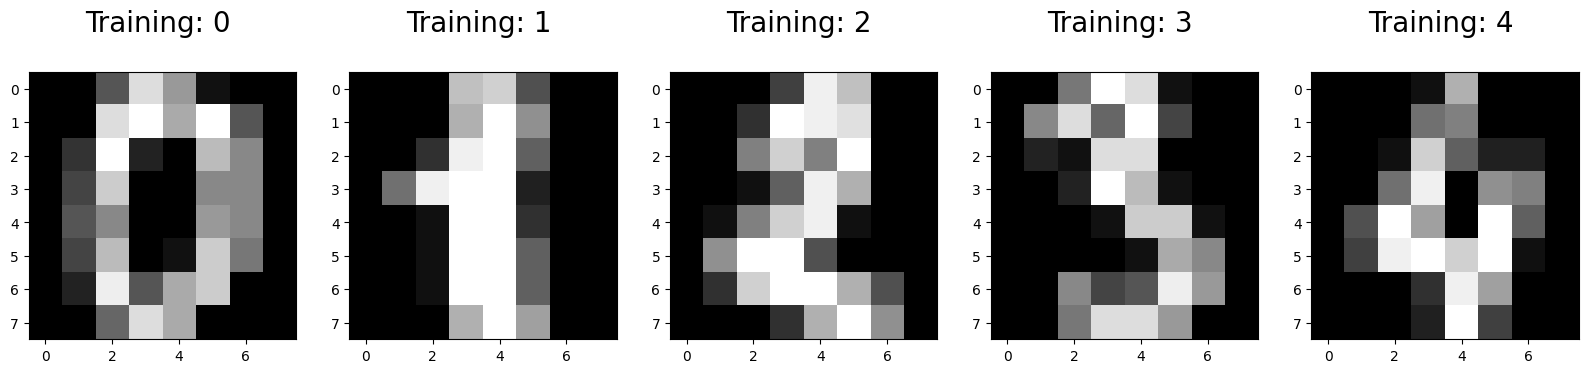

In [24]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5,index+1)
    # Reshapes the 64-value array into an 8x8 image and displays it in grayscale.
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i \n' % label, fontsize = 20)

In [25]:
 #splitting the dataset for training and testing
 from sklearn.model_selection import train_test_split
 x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size= 0.25, random_state=2)

In [26]:
 print(x_train.shape)

(1347, 64)


In [27]:
 print(y_train.shape)

(1347,)


In [28]:
 print(x_test.shape)

(450, 64)


In [29]:
 print(y_test.shape)

(450,)


In [33]:
#importing and training the model

from sklearn.linear_model import LogisticRegression

In [36]:
logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [37]:
#Predicting and observing for the first image
print(logisticRegr.predict(x_test[0].reshape(1,-1)))

[4]


In [38]:
#Predicting and observing for the first ten images
print(logisticRegr.predict(x_test[0:10]))

[4 0 9 1 8 7 1 5 1 6]


In [39]:
predictions = logisticRegr.predict(x_test)

In [40]:
#finding accuracy
score = logisticRegr.score(x_test, y_test)
print(score)

0.9444444444444444


In [41]:
#finding accuracy using confusion matrix

In [42]:
cm = metrics.confusion_matrix(y_test, predictions)
print (cm)

[[41  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  1  0  0  0  0  2  1]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  1  0  1  2  0]
 [ 0  0  0  0 36  0  0  0  3  1]
 [ 0  1  0  0  1 50  0  0  0  0]
 [ 0  1  0  0  0  0 41  0  1  0]
 [ 0  0  0  0  0  0  0 48  0  1]
 [ 0  1  0  0  0  0  0  0 38  1]
 [ 0  0  0  2  0  1  0  0  2 34]]


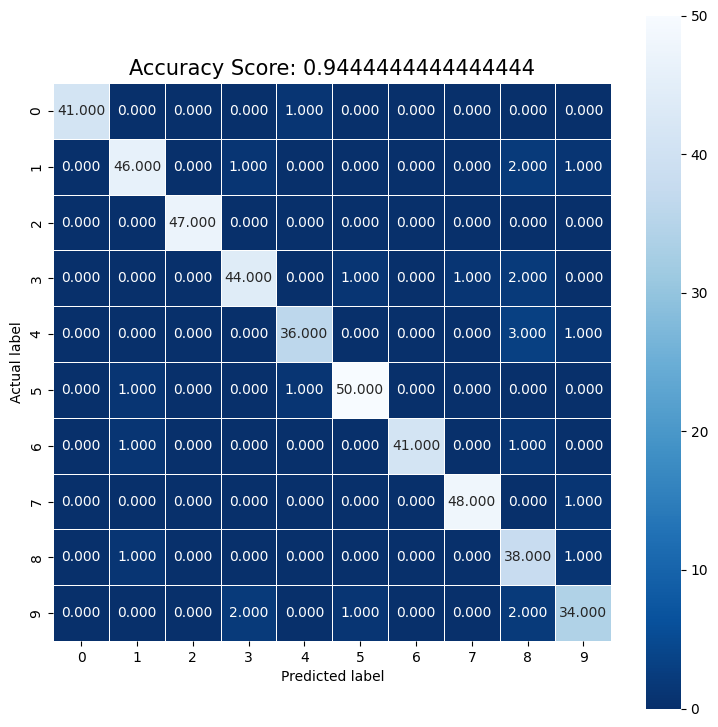

In [43]:
#showing heat_map
plt. figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel( 'Actual label');
plt.xlabel( 'Predicted label');
all_sample_title = 'Accuracy Score: {0}'. format (score)
plt. title(all_sample_title, size = 15);

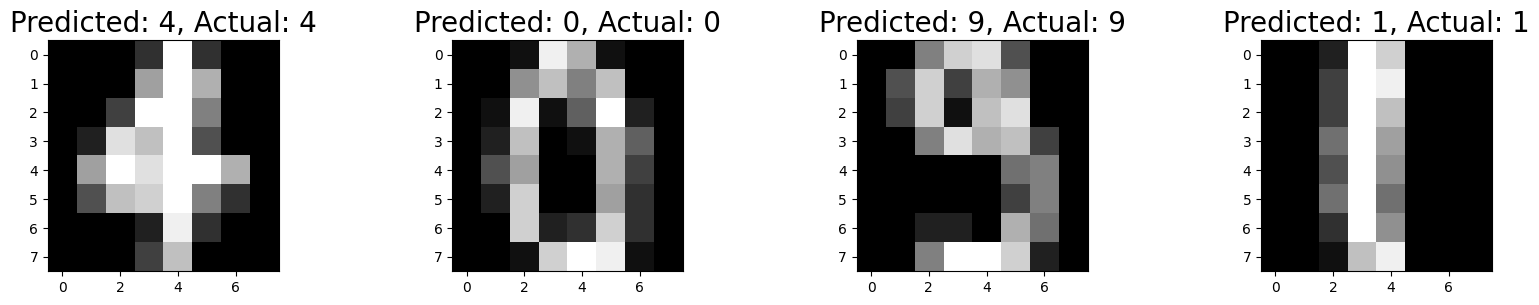

In [44]:
# Start an index counter
index = 0

# Empty list to store misclassified samples
misclassifiedIndex = []

for predict, actual in zip(predictions, y_test):
  if predict==actual:
    # If predicted == actual → add index to list
    misclassifiedIndex.append(index)
    # Increase index for each sample
    index +=1
plt. figure(figsize=(20,3))
# Take first 4 misclassified samples (indexes)
for plotIndex, wrong in enumerate(misclassifiedIndex[0:4]):
  plt. subplot (1,4, plotIndex +1)
  # Show the image (reshape to 8x8 pixels in gray color)
  plt. imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt. cm. gray)
  plt. title("Predicted: {}, Actual: {}" .format (predictions[wrong], y_test[wrong]), fontsize=20)